<a href="https://colab.research.google.com/github/dachylong/deeplearning_codes/blob/master/lesson2_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression Problem

In [0]:
%matplotlib inline
from fastai.vision import *

In [0]:
n = 100
x = torch.ones(n,2)           # n x 2 dimension tensor
x[:,0].uniform_(-1., 1)
x[:5]

tensor([[ 0.7117,  1.0000],
        [-0.4219,  1.0000],
        [-0.3712,  1.0000],
        [-0.1130,  1.0000],
        [-0.1723,  1.0000]])

In [0]:
# parameter vector
a = tensor(3., 2.)
a

tensor([3., 2.])

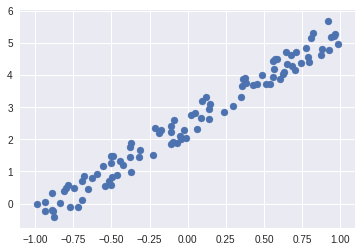

In [0]:
y = x@a + torch.rand(n)
plt.scatter(x[:,0], y)

In [0]:
def mse(y_hat, y):
  return ((y_hat - y)**2).mean()

In [0]:
a = tensor(-1., 1)
y_hat = x@a
mse(y_hat=y_hat, y=y)

tensor(7.6287)

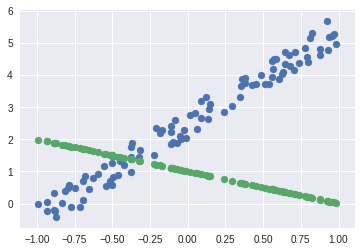

In [0]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_hat)

## Gradient Descent

Here is gradient descent implemented in Pytorch.

In [0]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update(lr=1e-1):
  y_hat = x@a
  loss = mse(y_hat, y)
  if t%10 == 0:
    print(loss)
   
  loss.backward()
  with torch.no_grad():
    a.sub_(lr * a.grad)
    a.grad.zero_()

In [0]:
for t in range(100):
  update(lr=1e-1)

tensor(7.6287, grad_fn=<MeanBackward1>)
tensor(1.3071, grad_fn=<MeanBackward1>)
tensor(0.3671, grad_fn=<MeanBackward1>)
tensor(0.1502, grad_fn=<MeanBackward1>)
tensor(0.0987, grad_fn=<MeanBackward1>)
tensor(0.0865, grad_fn=<MeanBackward1>)
tensor(0.0836, grad_fn=<MeanBackward1>)
tensor(0.0829, grad_fn=<MeanBackward1>)
tensor(0.0827, grad_fn=<MeanBackward1>)
tensor(0.0827, grad_fn=<MeanBackward1>)


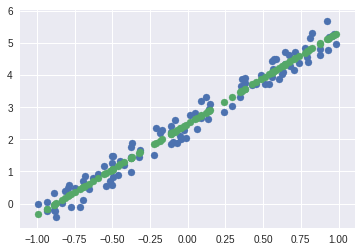

In [0]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], x@a)

## Animate it!

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [0]:
a = nn.Parameter(tensor(-1., 1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, *_ = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
  update()
  line.set_ydata(x@a)
  return line, 

In [0]:
animation.FuncAnimation(fig, animate, np.arange(0,100), interval=20 )